# TP2 : Data Mining

#### Import Library 

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

#### Read from file txt

In [2]:
T = pd.read_csv('ex2data1.txt',sep=",")

#### Data

In [3]:
T.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
dt = np.array(T,dtype="float")

#### Define function

In [5]:
def segmoide_funct(X,thetas):
    nbcol = X.shape[1]
    nblig = X.shape[0]
    ligne = []
    hx = []
    theta_t = thetas.reshape(1,nbcol)
    for i in range(nblig):
        ligne = X[i][:]
        ligne_t = ligne.reshape(nbcol,1)
        z = theta_t.dot(ligne_t)
        hx.append(1/(1+math.exp(-z)))
    return hx

In [26]:
def funct_cout(h,y,theta):
    nblign = len(h)
    somme = 0
    for i in range(nblign):
        somme += -y[0][i]*math.log(h[i])-(1-y[0][i])*math.log(1-h[i])
    j = somme/nblign
    return j

In [7]:
#features scaling using z-score
def scale(x):
    x_scaled = x - np.mean(x, axis=0)
    x_scaled = x_scaled / np.std(x_scaled, axis=0)
    return x_scaled

#### Initialize theta_j

In [8]:
theta = np.array([0]*len(T.columns))

#### Traitement

In [9]:
X = dt[:,:dt.shape[1]-1]
Y = dt[:,dt.shape[1]-1:]

In [10]:
Y= Y.T
X= scale(X)

In [11]:
r = np.array([1]*len(T),dtype="float")
X = np.c_[r,X]

In [12]:
for u in range(200000):
    theta_update = []
    h = segmoide_funct(X,theta)
    for i in range(len(theta)):
        somme = 0
        for j in range(len(Y[0])):
            somme += (h[j]-Y[0][j])*X[j][i]
        somme = somme/len(Y[0])
        theta_update.append(theta[i]-0.01*somme)
    theta = np.array(theta_update[:])

#### theta_j

In [29]:
print(f"theta 0 : {theta[0]} ,  theta 1 : {theta[1]} , theta 2 : {theta[2]}")

theta 0 : 1.7184440289064626 ,  theta 1 : 3.992775952490324 , theta 2 : 3.7251252276799542


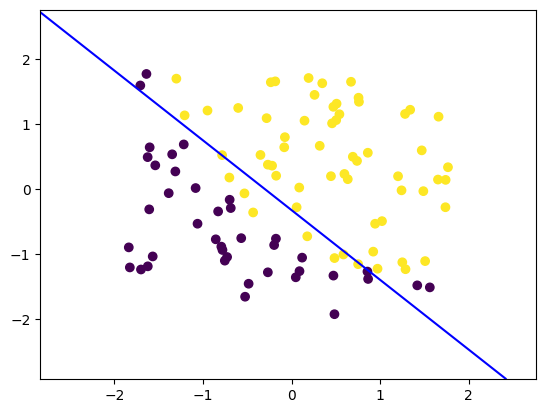

In [28]:
plt.scatter(X[:,1],X[:,2],c=Y)

h1 = .02

x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1),
                      np.arange(y_min, y_max, h1))

# t=[-24.06051097  , 0.1906839  ,  0.19415147]
# Z = t[0]+ t[1] *np.array(xx)+ t[2] *np.array(yy)

Z = theta[0]+ theta[1] *np.array(xx)+ theta[2] *np.array(yy)

Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='blue')
plt.show()

In [30]:
print(f" Cost function Value : {funct_cout(h,Y,theta)}")

 Cost function Value : 0.20349770159028538
